In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# 1. CARGA DEL FICHERO DE DATOS
file_path = "./DatosCaudalesBesos.csv"  # Cambia esto por la ruta de tu archivo si es diferente
TotalDat = pd.read_csv(file_path, encoding='latin1')

# 2. Inspección de los datos
print(TotalDat.info())     # Estructura de los datos
print(TotalDat.head())     # Ver las primeras filas
print(TotalDat.columns)    # Ver los nombres de las variables

# 3. Modificación de los tipos de datos y creación de nuevas variables
TotalDat['Estacio'] = TotalDat['Estacio'].astype('category')  # Convertir 'Estacio' a categoría
print(TotalDat['Estacio'].unique())  # Ver los valores únicos de la variable 'Estacio'

# 3.1 Renombrar con nombres cortos las estaciones de aforo y medida
# Nombres actuales
print(TotalDat['Estacio'].cat.categories)

# Definir los nuevos nombres cortos
nuevos_nombres = {
    'Aforament - Castellar del Vallès': "Castellar",
    'Aforament - Aiguafreda (riu)': "Aiguafreda",
    'Aforament - Montornès del Vallès (el Mogent)': "Montornes",
    'Aforament - Santa Perpètua de Mogoda': "Santa_Perpetua",
    'Aforament - Santa Coloma de Gramenet (riu)': "Santa_Coloma",
    'Aforament - Lliçà de Vall': "Llica_de_Vall",
    'Aforament - Montcada i Reixac (el Ripoll)': "Montcada_Reixac",
    'Aforament - la Garriga': "La_Garriga"
}

# Asignar los nuevos nombres
TotalDat['Estacio'] = TotalDat['Estacio'].replace(nuevos_nombres)
print(TotalDat.head())

# 3.2 Asegurarse de que la columna 'Dia' esté en formato de fecha
TotalDat['Fecha'] = pd.to_datetime(TotalDat['Dia'], format="%m/%d/%Y")

# Extraer el año correctamente ahora que la columna 'Fecha' está en el formato correcto
TotalDat['Year'] = TotalDat['Fecha'].dt.year

# Verificar si se creó la columna 'Year'
print(TotalDat.head())

# 3.3 Creación de nuevas variables (mes, año)
TotalDat['Mes'] = TotalDat['Fecha'].dt.month  # Extraer el mes
TotalDat['Year'] = TotalDat['Fecha'].dt.year  # Extraer el año

# 3.4 Mostrar las primeras filas para revisar las nuevas variables
print(TotalDat.head())

# 4. Cuántos datos tiene cada estación
print(TotalDat['Estacio'].value_counts())

# 5 Detección y eliminación de datos duplicados
DF_Montornes = TotalDat[TotalDat['Estacio'] == "Montornes"]

# Ordenar el dataframe por la columna 'Fecha'
DF_Montornes = DF_Montornes.sort_values(by='Fecha')
print(DF_Montornes.head())

# Eliminar las filas duplicadas
TotalDat = TotalDat.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24952 entries, 0 to 24951
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dia      24952 non-null  object 
 1   Estacio  24952 non-null  object 
 2   Valor    24842 non-null  float64
dtypes: float64(1), object(2)
memory usage: 584.9+ KB
None
         Dia                           Estacio  Valor
0  7/29/2000  Aforament - Castellar del Vallès   2.06
1  7/30/2000  Aforament - Castellar del Vallès   2.00
2  7/31/2000  Aforament - Castellar del Vallès   1.96
3   8/1/2000  Aforament - Castellar del Vallès   1.64
4   8/2/2000  Aforament - Castellar del Vallès   1.52
Index(['Dia', 'Estacio', 'Valor'], dtype='object')
['Aforament - Castellar del Vallès', 'Aforament - Aiguafreda (riu)', 'Aforament - Montornès del Vallès (el Mogent)', 'Aforament - Santa Perpètua de Mogoda', 'Aforament - Santa Coloma de Gramenet (riu)', 'Aforament - Lliçà de Vall', 'Aforament - Montcada i Reixac (el R

Estacio
Montcada_Reixac    3648
Llica_de_Vall      3646
Santa_Perpetua     3604
Montornes          3047
Santa_Coloma       2692
Castellar          2577
Aiguafreda         1493
La_Garriga         1198
Name: count, dtype: int64


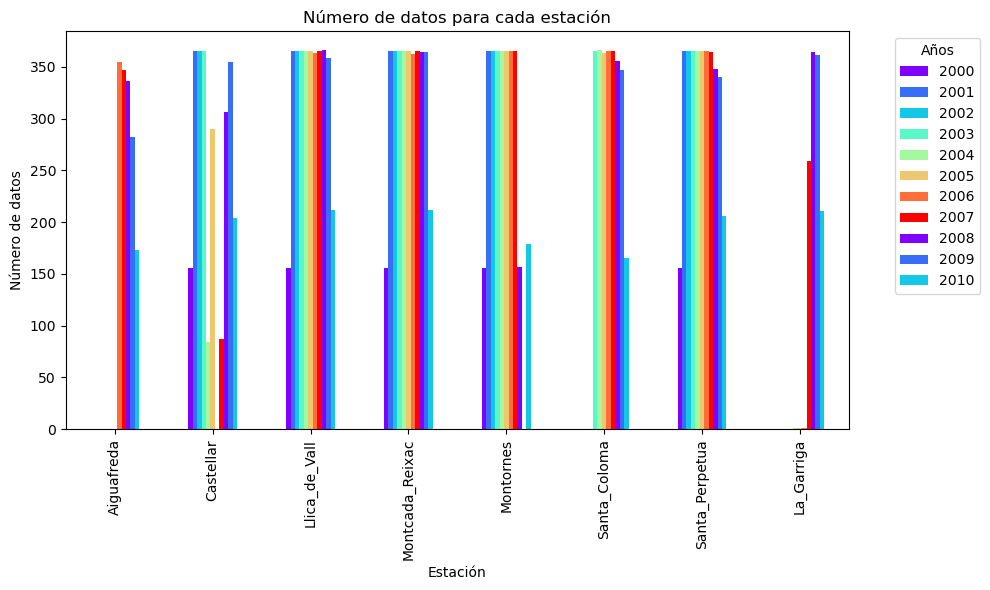

In [3]:
# Ver la tabla de frecuencia para la variable 'Estacio'
print(TotalDat['Estacio'].value_counts())

# 6. Distribución del número de datos por estaciones y años
tabla_contingencia = pd.crosstab(TotalDat['Estacio'], TotalDat['Year'])

# Crear el gráfico de barras
colors = plt.cm.rainbow(np.linspace(0, 1, len(tabla_contingencia)))

tabla_contingencia.plot(kind='bar', stacked=False, color=colors, figsize=(10, 6))
plt.title("Número de datos para cada estación")
plt.ylabel("Número de datos")
plt.xlabel("Estación")
plt.legend(title="Años", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [5]:
# Ejemplo de gráfico interactivo: Caudal medio por estación y año
df_grouped = TotalDat.groupby(['Estacio', 'Year']).agg({'Valor': 'mean'}).reset_index()

# Crear el gráfico interactivo con Plotly
fig = px.line(df_grouped, x='Year', y='Valor', color='Estacio',
              title="Caudal Medio por Estación y Año",
              labels={"Valor": "Caudal (m³/s)", "Year": "Año", "Estacio": "Estación"},
              hover_name="Estacio", hover_data={"Valor": True, "Year": True})

# Mostrar el gráfico interactivo
fig.show()
